Project_Amazon_Pricing  by Kiyoshi Iwaki

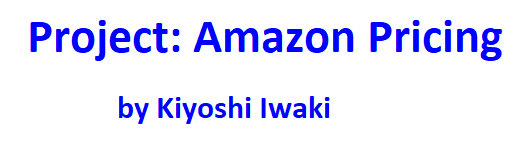


In order to copy paste charts and Graphs


In [140]:
pip install notebook --upgrade

Requirement already up-to-date: notebook in c:\users\kiyos\anaconda3\lib\site-packages (6.0.3)
Note: you may need to restart the kernel to use updated packages.


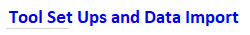

In [141]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [142]:
amzn = '../data/09-19-Amazon-Ranking-Analysis.csv'
am= pd.read_csv(amzn)
am

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,6/14/2016,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.00,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,6/14/2016,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.00,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",6/27/2016,1,1,1,3.96,3.96,speedy tests,Other,4.90,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",6/27/2016,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.90,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",6/27/2016,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.90,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6968,6968,myBaby SoundSpa Portable,8/30/2016,11,11,10,34.14,34.14,AMAZIN',Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
6969,6969,myBaby SoundSpa Portable,8/30/2016,12,12,11,34.98,34.98,Happy Titan,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
6970,6970,myBaby SoundSpa Portable,8/30/2016,13,13,12,35.00,35.00,DDN INC,Other,19.99,Amazon,Ships from and sold by Amazon.com.,26.77
6971,6971,myBaby SoundSpa Portable,8/30/2016,8,8,13,31.95,38.73,Marilyn's Galleria,FBA,19.99,Amazon,Ships from and sold by Amazon.com.,26.77


In [143]:
#Data Background(Provided by the article from data providers)

#1)The listings for 250 bestselling products across a wide range of categories, from electronics 
#   to household supplies, over a period of several weeks in 2016.(6/7/2016~9/6/2016)

#2)They wrote a software program that simulated a non-Prime Amazon member whose address was in Brooklyn, 
#   New York. 

#3)The software scraped the main product listing page and the subsequent pages 
#   that contained the listings of other vendors offering the same product.

#4)For items that were listed without a shipping price, the software added them to the shopping cart 
#   and proceeded to checkout, where the shipping price was displayed. 
#   All of the items that lacked a shipping price were sold by Amazon or sellers in the “Fulfilled by Amazon” program.

#5)Once we had shipping prices for all vendors, we re-calculated the combined price plus shipping for each item 
#   and re-ranked the items as they would have been ranked if shipping was included for all items.

#6)Each product’s information was collected during a single browsing session, 
#    to ensure that prices did not change while we were collecting data.

#7)They did not examine categories such as virtual goods, e-books and movies that do not have competing vendors 
#    and shipping costs. For all products, we excluded sales tax from our analysis.

## Article https://www.propublica.org/article/how-we-analyzed-amazons-shopping-algorithm

In [144]:
#Based on the data background above, here's data explanation for each data column
# 1) Index                       
# 2) ProductName               
# 3) ScrapeDate              Date data was extracted    
# 4) ScrapedIndex            Index(Ranking) extracted     
# 5) ScrapedIndexTrueRank    True Ranking extracted   
# 6) CorrectedIndexTrueRank  Corrected Ranking after adjusting shipping cost
# 7) ScrapedIndexPrice       Price extraced for the product
# 8) CorrectedPrice          Corrected price after adjusting shipping cost
# 9) ScrapedIndexVendor      Vendor Name Extraced 
#10) ScrapedIndexVendorType  Extracted Vendor Type Data   1.Other, 2.FBA, 3.Amazon    #FBA: Fillfulmentby Amazon
#11) BBCorrectedPrice         Extracted Price for the product by Subsequent Vendor
#12) BBVendorType            Extracted Subsequent Vendor Type
#13) BBVendor                Subsequent Vendor Name Extraced 
#14) BBCorrectedPrice        Corrected price after adjusting shipping cost from the Subsequent Vendor 

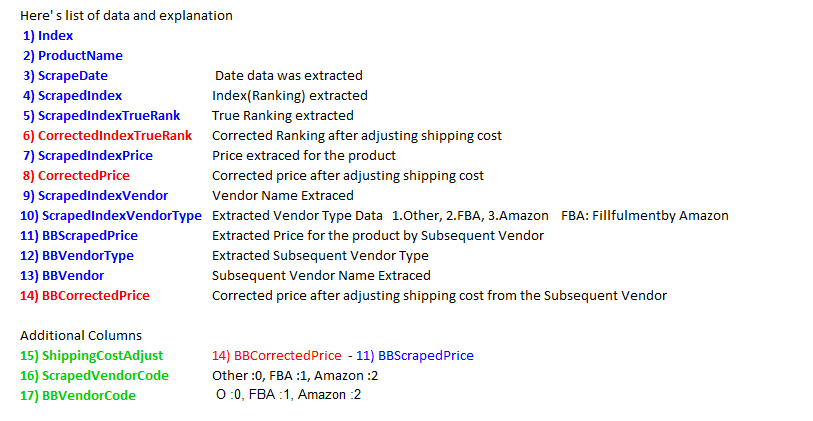

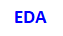

In [145]:
am.shape

(6973, 14)

In [146]:
am.dtypes

Index                       int64
ProductName                object
ScrapeDate                 object
ScrapedIndex                int64
ScrapedIndexTrueRank        int64
CorrectedIndexTrueRank      int64
ScrapedIndexPrice         float64
CorrectedPrice            float64
ScrapedIndexVendor         object
ScrapedIndexVendorType     object
BBScrapedPrice            float64
BBVendorType               object
BBVendor                   object
BBCorrectedPrice          float64
dtype: object

In [147]:
am.columns

Index(['Index', 'ProductName', 'ScrapeDate', 'ScrapedIndex',
       'ScrapedIndexTrueRank', 'CorrectedIndexTrueRank', 'ScrapedIndexPrice',
       'CorrectedPrice', 'ScrapedIndexVendor', 'ScrapedIndexVendorType',
       'BBScrapedPrice', 'BBVendorType', 'BBVendor', 'BBCorrectedPrice'],
      dtype='object')

In [148]:
am.describe()

,Index,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,BBScrapedPrice,BBCorrectedPrice
count,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000,6973.000000
mean,3486.000000,25.041876,22.730962,21.559300,54.904896,55.567631,36.295817,45.827961
std,2013.076046,23.618871,20.520442,19.154709,74.293356,74.476092,61.838063,63.889925
min,0.000000,1.000000,1.000000,1.000000,2.380000,2.380000,-1.000000,0.000000
25%,1743.000000,8.000000,7.000000,7.000000,19.530000,20.010000,8.990000,15.790000
50%,3486.000000,17.000000,16.000000,16.000000,31.900000,32.080000,14.940000,23.340000
75%,5229.000000,35.000000,33.000000,31.000000,55.890000,56.100000,36.990000,47.920000
max,6972.000000,162.000000,113.000000,107.000000,931.800000,931.800000,698.000000,706.110000


In [149]:
am.isnull().sum()

Index                       0
ProductName                 0
ScrapeDate                  0
ScrapedIndex                0
ScrapedIndexTrueRank        0
CorrectedIndexTrueRank      0
ScrapedIndexPrice           0
CorrectedPrice              0
ScrapedIndexVendor          0
ScrapedIndexVendorType      0
BBScrapedPrice              0
BBVendorType                0
BBVendor                  164
BBCorrectedPrice            0
dtype: int64

In [150]:
product=am.ProductName.value_counts()
product.head(15)

Fujifilm INSTAX Mini Instant Film (Rainbow)                                                                       154
Suncast GHW1732 Resin Wicker Trash Hideaway                                                                       115
Fiskars 45mm Contour Rotary Cutter (195210-1001)                                                                  106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit                                                              95
Honeywell HT-908 Turbo Force Room Air Circulator Fan                                                               90
Sassy Developmental Bumpy Ball                                                                                     88
K&N KN-204 Motorcycle/Powersports High Performance Oil Filter                                                      87
ASUS (RT-AC68U) Wireless-AC1900 Dual-Band Gigabit Router                                                           87
Bushnell H2O Waterproof Compact Roof Prism Binocular, Bl

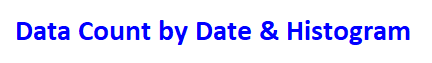

6/13/2016     27
6/14/2016    666
6/15/2016    242
6/16/2016    176
6/17/2016    314
6/18/2016    151
6/19/2016    225
6/20/2016    139
6/21/2016    773
6/24/2016     46
6/25/2016      9
6/26/2016    657
6/27/2016    400
6/28/2016     97
6/29/2016    273
6/7/2016     259
6/8/2016     154
7/4/2016     117
7/8/2016      91
8/18/2016     15
8/29/2016    454
8/30/2016    516
8/31/2016    188
9/1/2016      65
9/2/2016     190
9/6/2016     729
Name: ScrapeDate, dtype: int64


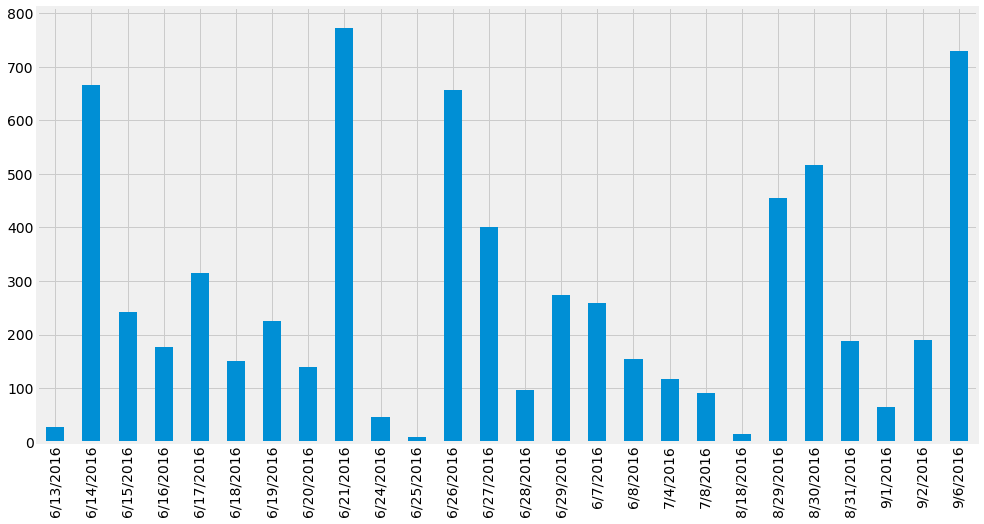

In [151]:
ax=am.ScrapeDate.value_counts().sort_index()
print(ax)
ax.plot(kind='bar', figsize=(15,8))

   Index  ScrapedIndexTrueRank  CorrectedIndexTrueRank  Change1
0      0                     2                       1       -1
1      1                     1                       2        1
2      2                     1                       1        0
3      3                     1                       1        0
4      4                     1                       1        0
5      5                     9                       1       -8
6      6                     3                       2       -1
7      7                     4                       3       -1
8      8                     5                       4       -1
9      9                     6                       5       -1


C:\Users\kiyos\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


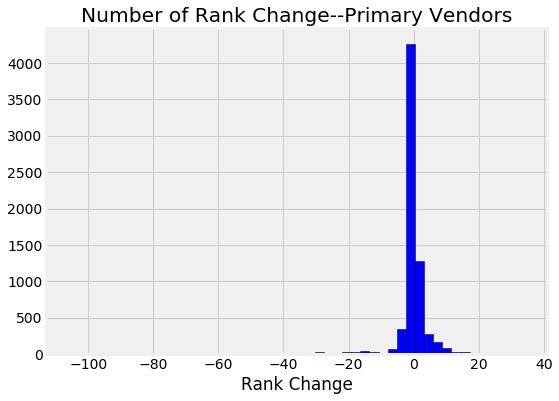

In [152]:
Rank_Change=am[['Index','ScrapedIndexTrueRank','CorrectedIndexTrueRank']]
Rank_Change['Change1']=Rank_Change.CorrectedIndexTrueRank-Rank_Change.ScrapedIndexTrueRank
print(Rank_Change.head(10))
plt.hist(Rank_Change['Change1'], color = 'blue', edgecolor = 'black', bins=50)
plt.xlabel('Rank Change')
plt.title('Number of Rank Change--Primary Vendors');


   Index  ScrapedIndexPrice  CorrectedPrice  Correction
0      0              20.99           20.99        0.00
1      1              19.99           25.02        5.03
2      2               3.96            3.96        0.00
3      3               3.96            3.96        0.00
4      4               3.96            3.96        0.00
5      5               3.96            3.96        0.00
6      6               6.50            6.50        0.00
7      7               7.99            7.99        0.00
8      8               8.49            8.49        0.00
9      9               8.99            8.99        0.00


C:\Users\kiyos\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


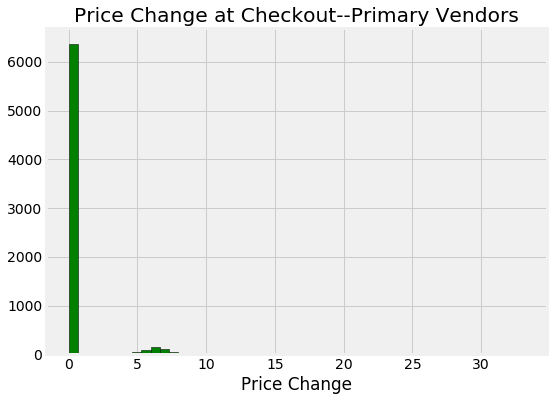

In [153]:
Price_Change=am[['Index','ScrapedIndexPrice','CorrectedPrice']]
Price_Change['Correction']=Price_Change.CorrectedPrice-Price_Change.ScrapedIndexPrice
print(Price_Change.head(10))

plt.hist(Price_Change['Correction'], color = 'green', edgecolor = 'black', bins=50)
plt.xlabel('Price Change')
plt.title('Price Change at Checkout--Primary Vendors');

In [154]:
am['ShippingCostAdjust']=am.BBCorrectedPrice-am.BBScrapedPrice

   BBScrapedPrice  BBCorrectedPrice  ShippingCostAdjust
0            -1.0             25.02               26.02
1            -1.0             25.02               26.02
2             4.9              9.97                5.07
3             4.9              9.97                5.07
4             4.9              9.97                5.07
5             4.9              9.97                5.07
6             4.9              9.97                5.07
7             4.9              9.97                5.07
8             4.9              9.97                5.07
9             4.9              9.97                5.07


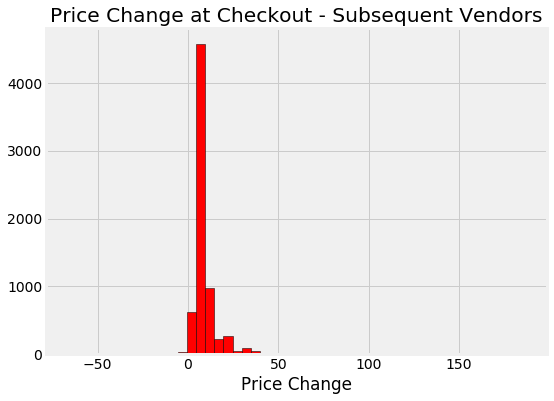

In [155]:
Price_Change=am[['BBScrapedPrice','BBCorrectedPrice','ShippingCostAdjust']]

print(Price_Change.head(10))

plt.hist(Price_Change['ShippingCostAdjust'], color = 'red', edgecolor = 'black', bins=50);
plt.xlabel('Price Change')
plt.title('Price Change at Checkout - Subsequent Vendors');


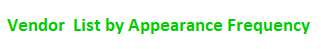

In [156]:
am.ScrapedIndexVendor.value_counts()

Amazon.com             192
UnbeatableSale, Inc     47
Gatzies                 41
DDN INC                 37
Toys US                 35
                      ... 
JadeCollectibles         1
The Lilly Pad            1
ShopAmerica              1
B Baby                   1
LTS Services inc.        1
Name: ScrapedIndexVendor, Length: 2892, dtype: int64

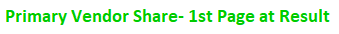

Other     6372
FBA        409
Amazon     192
Name: ScrapedIndexVendorType, dtype: int64


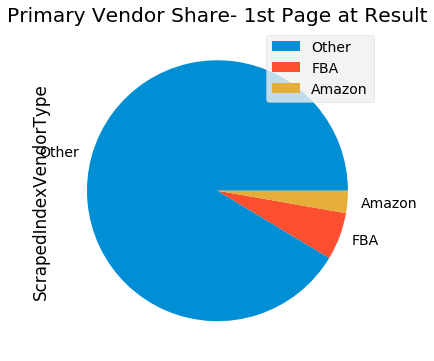

In [157]:
vendor1=am.ScrapedIndexVendorType.value_counts()
print(vendor1)
ax=vendor1.plot(kind='pie', figsize=(18,6))
ax.legend(loc=1)
plt.title('Primary Vendor Share- 1st Page at Result');


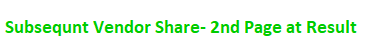

Amazon    5788
O          715
FBA        470
Name: BBVendorType, dtype: int64


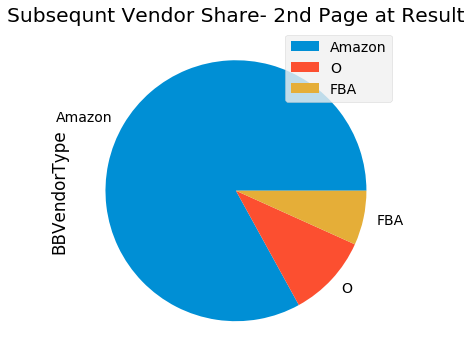

In [158]:
vendor2=am.BBVendorType.value_counts()
print(vendor2)
ax=vendor2.plot(kind='pie', figsize=(18,6))
ax.legend(loc=1)
plt.title('Subsequnt Vendor Share- 2nd Page at Result');

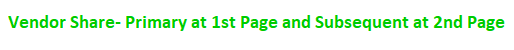

In [159]:
am.groupby('ScrapedIndexVendorType').BBVendorType.value_counts()

ScrapedIndexVendorType  BBVendorType
Amazon                  Amazon           178
                        FBA                9
                        O                  5
FBA                     Amazon           260
                        FBA               95
                        O                 54
Other                   Amazon          5350
                        O                656
                        FBA              366
Name: BBVendorType, dtype: int64

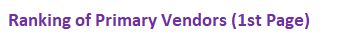

In [160]:
mask=(am.ScrapedIndexVendorType=='Other')&(am.ScrapedIndex<10)
Other3=am[mask]
Other3.groupby('ScrapedIndexVendorType').ScrapedIndex.value_counts().sort_index()

ScrapedIndexVendorType  ScrapedIndex
Other                   1                93
                        2               170
                        3               177
                        4               190
                        5               187
                        6               202
                        7               195
                        8               196
                        9               193
Name: ScrapedIndex, dtype: int64

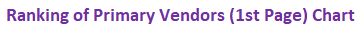

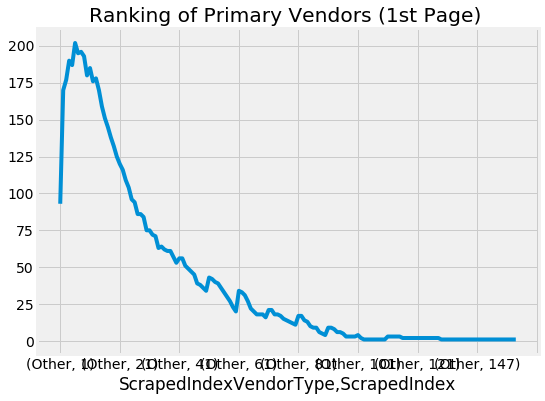

In [161]:
mask=(am.ScrapedIndexVendorType=='Other')
Other4=am[mask]
Other4.groupby('ScrapedIndexVendorType').ScrapedIndex.value_counts().sort_index().plot()
plt.title('Ranking of Primary Vendors (1st Page) ');

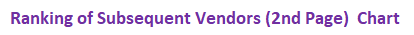

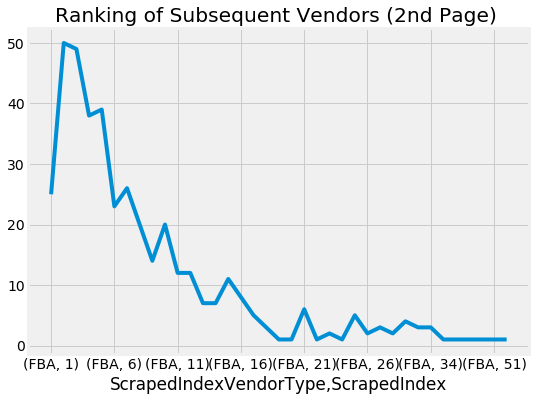

In [162]:
mask=(am.ScrapedIndexVendorType=='FBA')
Other5=am[mask]
Other5.groupby('ScrapedIndexVendorType').ScrapedIndex.value_counts().sort_index().plot()
plt.title('Ranking of Subsequent Vendors (2nd Page) ');

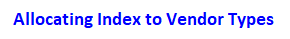

In [163]:

am['ScrapedVendorCode']=am.ScrapedIndexVendorType.map({'Other':0,'FBA':1,'Amazon':2})
am['BBVendorCode']=am.BBVendorType.map({'O':0,'FBA':1,'Amazon':2})
am.head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice,ShippingCostAdjust,ScrapedVendorCode,BBVendorCode
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,6/14/2016,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,26.02,0,1
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,6/14/2016,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02,26.02,1,1
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",6/27/2016,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,5.07,0,1
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",6/27/2016,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,5.07,0,1
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",6/27/2016,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97,5.07,0,1


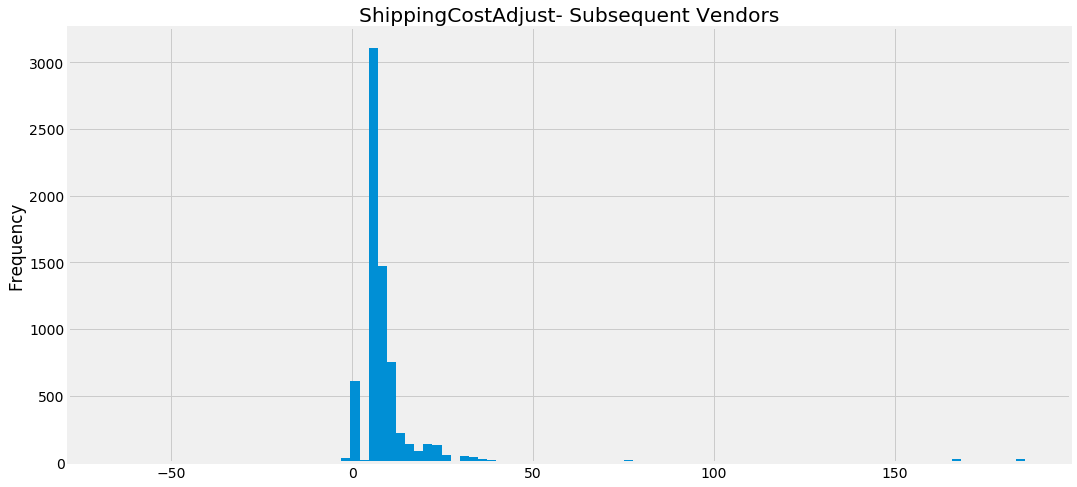

In [164]:
am.ShippingCostAdjust.plot(kind='hist',bins=100,figsize=(16,8))
plt.title('ShippingCostAdjust- Subsequent Vendors');

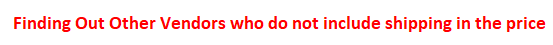

In [165]:
mask1=(am.BBVendorType=='O')&(am.ShippingCostAdjust>0)
Other1=am[mask1]
Other1.head(5)
           

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice,ShippingCostAdjust,ScrapedVendorCode,BBVendorCode
19,19,2wayz FULL METAL BODY Garden Hose Splitter | Y...,6/20/2016,1,1,1,40.00,40.00,Irtenzia,Other,-1.00,O,NaN,9.97,10.97,0,0
20,20,2wayz FULL METAL BODY Garden Hose Splitter | Y...,6/20/2016,2,2,2,54.94,54.94,Mild Shop,Other,-1.00,O,NaN,9.97,10.97,0,0
429,429,Accutire MS-4021B Digital Tire Pressure Gauge,8/30/2016,1,1,1,13.59,13.59,Adams Brown Company,Other,10.99,O,Ships from and sold by Adams Brown Company.,13.59,2.60,0,0
430,430,Accutire MS-4021B Digital Tire Pressure Gauge,8/30/2016,3,3,2,14.94,14.94,Palm Beach Motoring Accessories,Other,10.99,O,Ships from and sold by Adams Brown Company.,13.59,2.60,0,0
431,431,Accutire MS-4021B Digital Tire Pressure Gauge,8/30/2016,4,4,3,15.36,15.36,ZipZab,Other,10.99,O,Ships from and sold by Adams Brown Company.,13.59,2.60,0,0


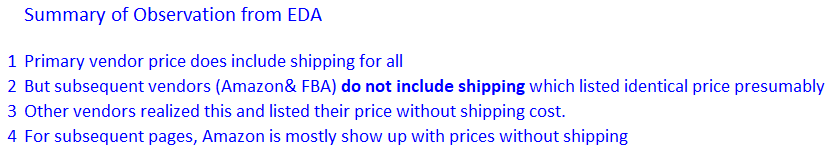

In [166]:
product=am.ProductName.value_counts()
product.head(15)

Fujifilm INSTAX Mini Instant Film (Rainbow)                                                                       154
Suncast GHW1732 Resin Wicker Trash Hideaway                                                                       115
Fiskars 45mm Contour Rotary Cutter (195210-1001)                                                                  106
K&N 99-5000 Aerosol Recharger Filter Care Service Kit                                                              95
Honeywell HT-908 Turbo Force Room Air Circulator Fan                                                               90
Sassy Developmental Bumpy Ball                                                                                     88
K&N KN-204 Motorcycle/Powersports High Performance Oil Filter                                                      87
ASUS (RT-AC68U) Wireless-AC1900 Dual-Band Gigabit Router                                                           87
Bushnell H2O Waterproof Compact Roof Prism Binocular, Bl

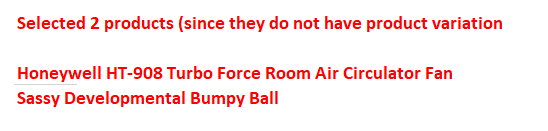

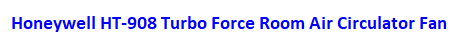

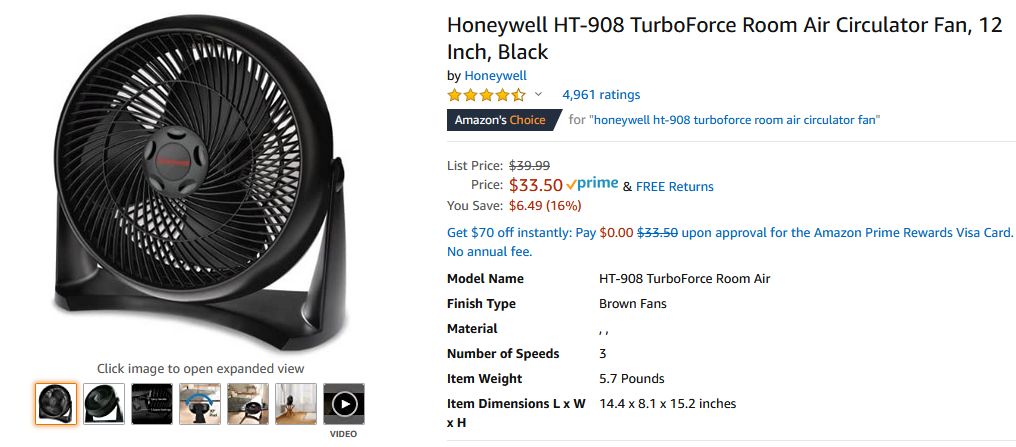

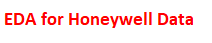

In [167]:
mask = (am.ProductName =='Honeywell HT-908 Turbo Force Room Air Circulator Fan')
am_honey=am[mask]
am_honey.head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice,ShippingCostAdjust,ScrapedVendorCode,BBVendorCode
3152,3152,Honeywell HT-908 Turbo Force Room Air Circulat...,9/6/2016,1,1,1,28.99,28.99,odzddp3,Other,29.67,Amazon,Ships from and sold by Amazon.com.,40.04,10.37,0,2
3153,3153,Honeywell HT-908 Turbo Force Room Air Circulat...,9/6/2016,3,3,2,29.67,29.67,TME LLC,Other,29.67,Amazon,Ships from and sold by Amazon.com.,40.04,10.37,0,2
3154,3154,Honeywell HT-908 Turbo Force Room Air Circulat...,9/6/2016,4,3,2,29.67,29.67,Ona Enterprises,Other,29.67,Amazon,Ships from and sold by Amazon.com.,40.04,10.37,0,2
3155,3155,Honeywell HT-908 Turbo Force Room Air Circulat...,9/6/2016,6,5,3,36.99,36.99,Sally's Super Savings,Other,29.67,Amazon,Ships from and sold by Amazon.com.,40.04,10.37,0,2
3156,3156,Honeywell HT-908 Turbo Force Room Air Circulat...,9/6/2016,7,6,4,37.41,37.41,BuyVPC,Other,29.67,Amazon,Ships from and sold by Amazon.com.,40.04,10.37,0,2


In [168]:
am_honey.describe()

,Index,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,BBScrapedPrice,BBCorrectedPrice,ShippingCostAdjust,ScrapedVendorCode,BBVendorCode
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01,9.000000e+01,9.000000e+01,90.000000,90.0
mean,3196.500000,45.500000,43.022222,43.011111,47.392667,47.623111,2.967000e+01,4.004000e+01,1.037000e+01,0.033333,2.0
std,26.124701,26.124701,24.846033,24.864349,7.020986,6.655048,3.572617e-14,2.858094e-14,5.358925e-15,0.234641,0.0
min,3152.000000,1.000000,1.000000,1.000000,28.990000,28.990000,2.967000e+01,4.004000e+01,1.037000e+01,0.000000,2.0
25%,3174.250000,23.250000,22.250000,22.250000,43.342500,43.530000,2.967000e+01,4.004000e+01,1.037000e+01,0.000000,2.0
50%,3196.500000,45.500000,43.500000,43.500000,47.760000,47.760000,2.967000e+01,4.004000e+01,1.037000e+01,0.000000,2.0
75%,3218.750000,67.750000,63.750000,63.750000,52.502500,52.502500,2.967000e+01,4.004000e+01,1.037000e+01,0.000000,2.0
max,3241.000000,90.000000,86.000000,86.000000,59.230000,59.230000,2.967000e+01,4.004000e+01,1.037000e+01,2.000000,2.0


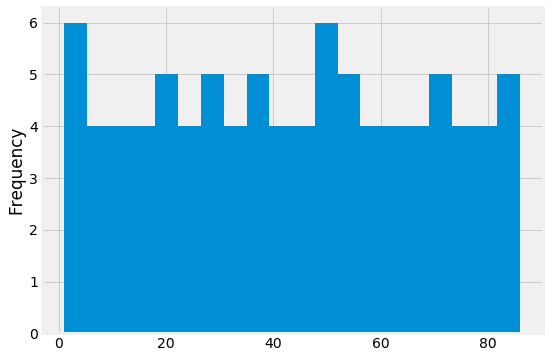

In [169]:
am_honey.CorrectedIndexTrueRank.plot(kind='hist',bins=20)

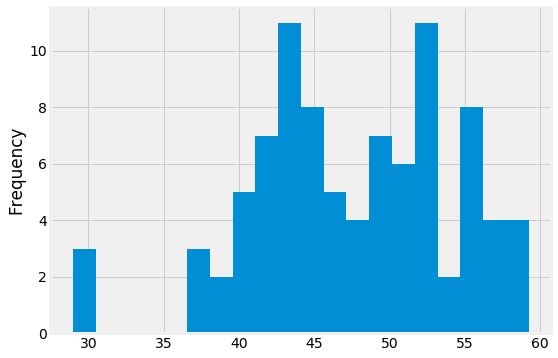

In [170]:
am_honey.CorrectedPrice.plot(kind='hist',bins=20)

In [171]:
mask = (am_honey.CorrectedPrice <35)
am_honey_price=am_honey[mask]
am_honey_price

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice,ShippingCostAdjust,ScrapedVendorCode,BBVendorCode
3152,3152,Honeywell HT-908 Turbo Force Room Air Circulat...,9/6/2016,1,1,1,28.99,28.99,odzddp3,Other,29.67,Amazon,Ships from and sold by Amazon.com.,40.04,10.37,0,2
3153,3153,Honeywell HT-908 Turbo Force Room Air Circulat...,9/6/2016,3,3,2,29.67,29.67,TME LLC,Other,29.67,Amazon,Ships from and sold by Amazon.com.,40.04,10.37,0,2
3154,3154,Honeywell HT-908 Turbo Force Room Air Circulat...,9/6/2016,4,3,2,29.67,29.67,Ona Enterprises,Other,29.67,Amazon,Ships from and sold by Amazon.com.,40.04,10.37,0,2


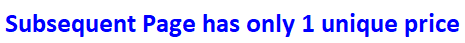

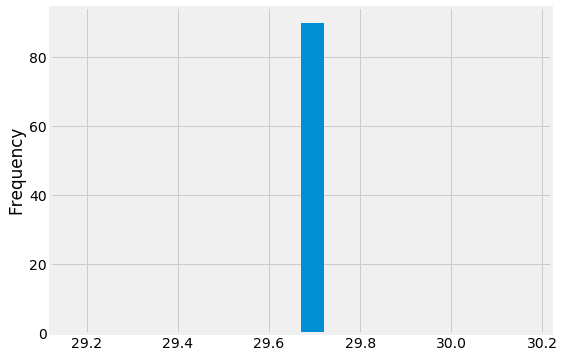

In [172]:
am_honey.BBScrapedPrice.plot(kind='hist',bins=20)

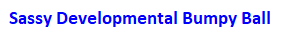

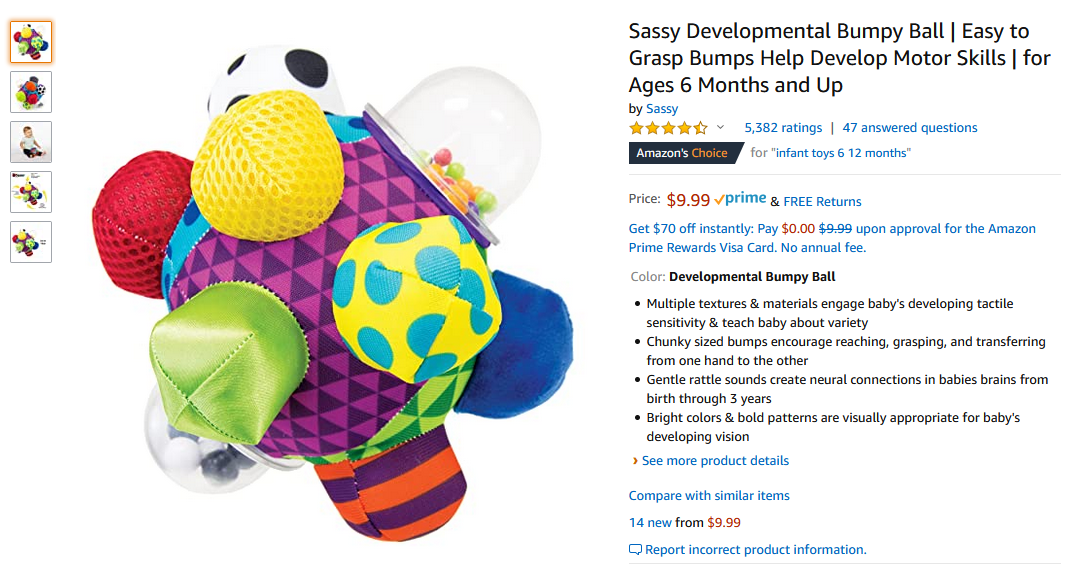

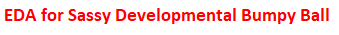

In [173]:
mask = (am.ProductName =='Sassy Developmental Bumpy Ball')
am_sassy=am[mask]
am_sassy.head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice,ShippingCostAdjust,ScrapedVendorCode,BBVendorCode
5929,5929,Sassy Developmental Bumpy Ball,8/30/2016,1,1,1,5.70,5.70,OutTop,Other,6.49,Amazon,Ships from and sold by Amazon.com.,12.78,6.29,0,2
5930,5930,Sassy Developmental Bumpy Ball,8/30/2016,3,3,2,7.99,7.99,XIAOXIAOBIN STORE,Other,6.49,Amazon,Ships from and sold by Amazon.com.,12.78,6.29,0,2
5931,5931,Sassy Developmental Bumpy Ball,8/30/2016,4,4,3,8.99,8.99,Batoni Super Deals (Proudly Ships from USA),Other,6.49,Amazon,Ships from and sold by Amazon.com.,12.78,6.29,0,2
5932,5932,Sassy Developmental Bumpy Ball,8/30/2016,5,5,4,9.49,9.49,Go 4 Direction,Other,6.49,Amazon,Ships from and sold by Amazon.com.,12.78,6.29,0,2
5933,5933,Sassy Developmental Bumpy Ball,8/30/2016,6,6,5,9.81,9.81,BabyHaven,Other,6.49,Amazon,Ships from and sold by Amazon.com.,12.78,6.29,0,2


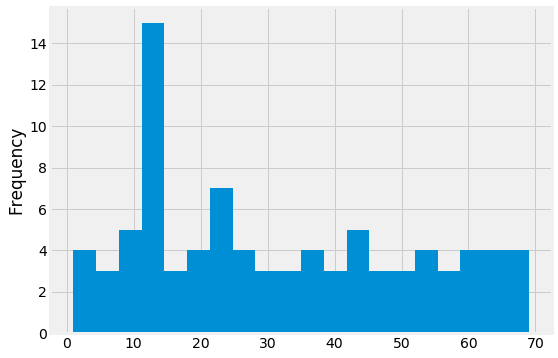

In [174]:
am_sassy.CorrectedIndexTrueRank.plot(kind='hist',bins=20)

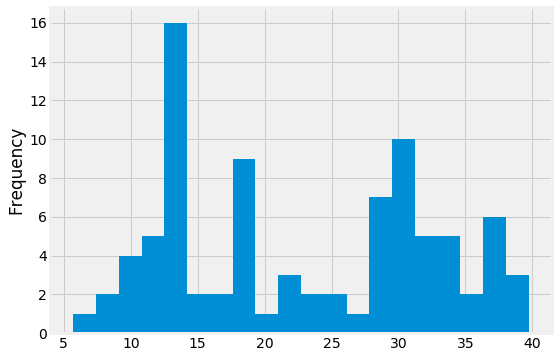

In [175]:
am_sassy.CorrectedPrice.plot(kind='hist',bins=20)

In [176]:
mask = (am_sassy.CorrectedPrice <10)
am_sassy_price=am_sassy[mask]
am_sassy_price

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice,ShippingCostAdjust,ScrapedVendorCode,BBVendorCode
5929,5929,Sassy Developmental Bumpy Ball,8/30/2016,1,1,1,5.70,5.70,OutTop,Other,6.49,Amazon,Ships from and sold by Amazon.com.,12.78,6.29,0,2
5930,5930,Sassy Developmental Bumpy Ball,8/30/2016,3,3,2,7.99,7.99,XIAOXIAOBIN STORE,Other,6.49,Amazon,Ships from and sold by Amazon.com.,12.78,6.29,0,2
5931,5931,Sassy Developmental Bumpy Ball,8/30/2016,4,4,3,8.99,8.99,Batoni Super Deals (Proudly Ships from USA),Other,6.49,Amazon,Ships from and sold by Amazon.com.,12.78,6.29,0,2
5932,5932,Sassy Developmental Bumpy Ball,8/30/2016,5,5,4,9.49,9.49,Go 4 Direction,Other,6.49,Amazon,Ships from and sold by Amazon.com.,12.78,6.29,0,2
5933,5933,Sassy Developmental Bumpy Ball,8/30/2016,6,6,5,9.81,9.81,BabyHaven,Other,6.49,Amazon,Ships from and sold by Amazon.com.,12.78,6.29,0,2


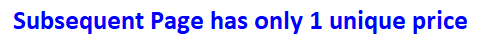

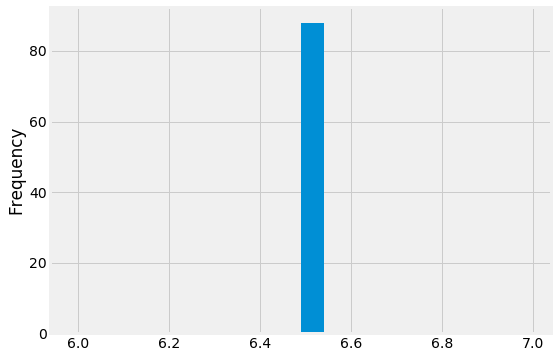

In [177]:
am_sassy.BBScrapedPrice.plot(kind='hist',bins=20)

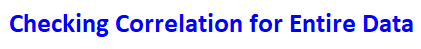

In [178]:
am.corr()

,Index,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,BBScrapedPrice,BBCorrectedPrice,ShippingCostAdjust,ScrapedVendorCode,BBVendorCode
Index,1.000000,-0.041440,-0.041483,-0.052926,-0.081656,-0.081318,-0.062443,-0.072889,-0.051441,0.012752,-0.053601
ScrapedIndex,-0.041440,1.000000,0.986999,0.861782,0.033243,0.026051,-0.040437,-0.051168,-0.049697,-0.241146,0.167697
ScrapedIndexTrueRank,-0.041483,0.986999,1.000000,0.897189,0.033702,0.026145,-0.048845,-0.059107,-0.048880,-0.253046,0.182181
CorrectedIndexTrueRank,-0.052926,0.861782,0.897189,1.000000,0.046877,0.041911,-0.047200,-0.057569,-0.049102,-0.168140,0.191903
ScrapedIndexPrice,-0.081656,0.033243,0.033702,0.046877,1.000000,0.999510,0.948636,0.967543,0.203987,-0.000384,0.015484
CorrectedPrice,-0.081318,0.026051,0.026145,0.041911,0.999510,1.000000,0.949922,0.968685,0.203559,0.027484,0.014595
BBScrapedPrice,-0.062443,-0.040437,-0.048845,-0.047200,0.948636,0.949922,1.000000,0.970268,0.009850,0.053542,0.050590
BBCorrectedPrice,-0.072889,-0.051168,-0.059107,-0.057569,0.967543,0.968685,0.970268,1.000000,0.251576,0.049019,0.009609
ShippingCostAdjust,-0.051441,-0.049697,-0.048880,-0.049102,0.203987,0.203559,0.009850,0.251576,1.000000,-0.011583,-0.162600
ScrapedVendorCode,0.012752,-0.241146,-0.253046,-0.168140,-0.000384,0.027484,0.053542,0.049019,-0.011583,1.000000,-0.014256


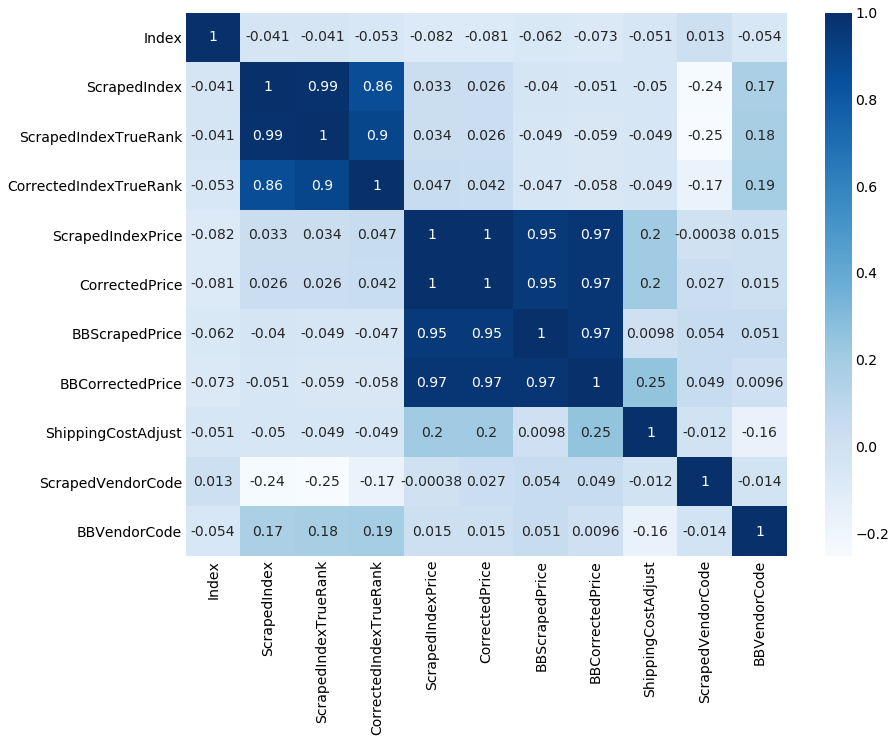

In [179]:
plt.figure(figsize=(12,10))
cor = am.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

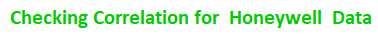

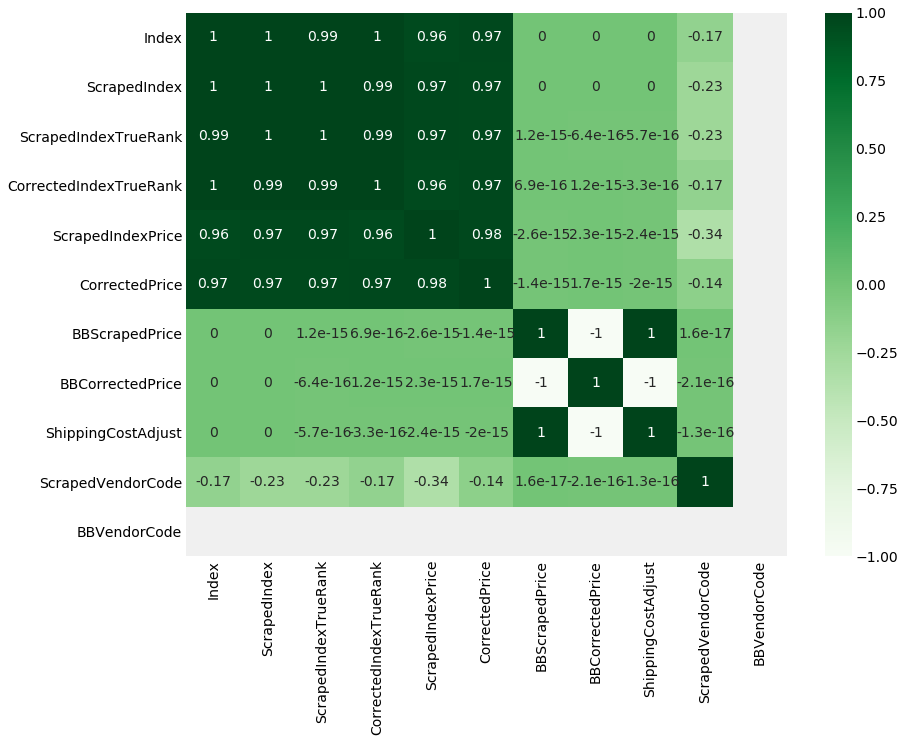

In [180]:
plt.figure(figsize=(12,10))
cor2 = am_honey.corr()
sns.heatmap(cor2, annot=True, cmap=plt.cm.Greens)
plt.show()

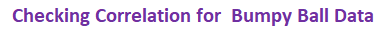

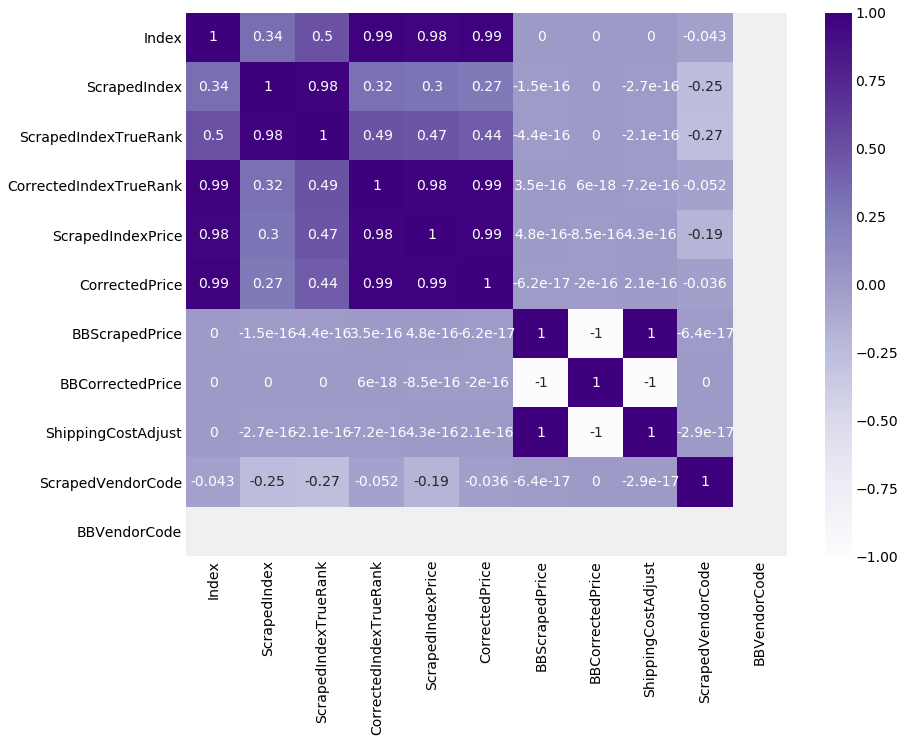

In [181]:
plt.figure(figsize=(12,10))
cor3 = am_sassy.corr()
sns.heatmap(cor3, annot=True, cmap=plt.cm.Purples)
plt.show()

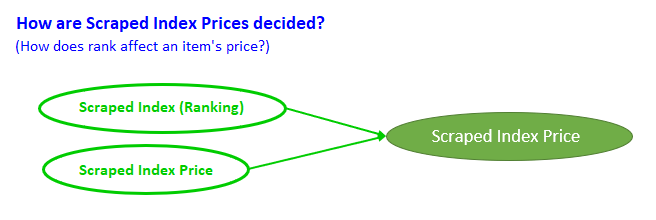

In [182]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()


In [183]:
am1=pd.get_dummies(am[['ScrapedVendorCode','ScrapedIndex','ScrapedIndexPrice']],drop_first=True)
am1

,ScrapedVendorCode,ScrapedIndex,ScrapedIndexPrice
0,0,2,20.99
1,1,1,19.99
2,0,1,3.96
3,0,2,3.96
4,0,3,3.96
...,...,...,...
6968,0,11,34.14
6969,0,12,34.98
6970,0,13,35.00
6971,1,8,31.95


In [184]:
feature_cols = ['ScrapedVendorCode','ScrapedIndex']
X = am1[feature_cols]
y = am1.ScrapedIndexPrice

In [185]:
linreg.fit(X,y)
y_pred = linreg.predict(X)

am['ScrapedIndexPrice_Pred'] = y_pred


Text(0, 0.5, 'ScrapedIndexPrice')

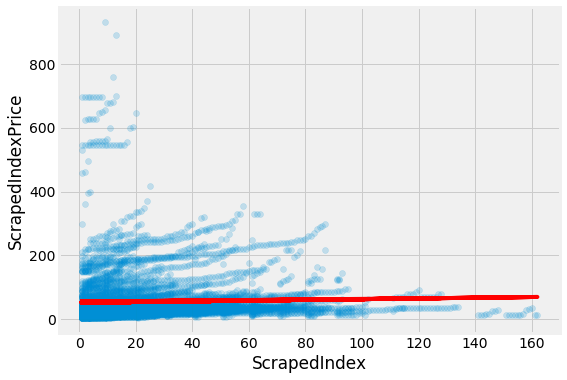

In [186]:
plt.scatter(am.ScrapedIndex,am.ScrapedIndexPrice, alpha=0.2)
plt.plot(am.ScrapedIndex, am.ScrapedIndexPrice_Pred, color='red')
plt.xlabel('ScrapedIndex')
plt.ylabel('ScrapedIndexPrice')

In [187]:
# R2 is low 

In [188]:
linreg.score(X, y)

0.0011669609277585868

In [189]:
am_honey1=pd.get_dummies(am_honey[['ScrapedVendorCode','ScrapedIndex','ScrapedIndexPrice']],drop_first=True)
am_honey1

,ScrapedVendorCode,ScrapedIndex,ScrapedIndexPrice
3152,0,1,28.99
3153,0,3,29.67
3154,0,4,29.67
3155,0,6,36.99
3156,0,7,37.41
...,...,...,...
3237,0,86,57.52
3238,0,87,58.49
3239,0,88,58.89
3240,0,89,58.99


In [190]:
feature_cols = ['ScrapedVendorCode','ScrapedIndex']
X = am_honey1[feature_cols]
y = am_honey1.ScrapedIndexPrice

In [191]:
linreg.fit(X,y)
pred_honey1 = linreg.predict(X)
pred_honey1

array([36.23344924, 36.74019477, 36.99356753, 37.50031306, 37.75368583,
       38.00705859, 38.26043135, 38.51380412, 29.53458828, 38.76717688,
       39.02054964, 39.27392241, 39.52729517, 39.78066794, 40.0340407 ,
       40.28741346, 40.54078623, 40.79415899, 41.04753175, 41.30090452,
       41.55427728, 41.80765005, 42.06102281, 42.31439557, 42.56776834,
       42.8211411 , 33.77082344, 43.07451386, 43.32788663, 43.58125939,
       43.83463215, 44.08800492, 44.34137768, 44.59475045, 44.84812321,
       45.10149597, 45.35486874, 45.6082415 , 45.86161426, 46.11498703,
       46.36835979, 46.62173256, 46.87510532, 47.12847808, 47.38185085,
       47.63522361, 47.88859637, 48.14196914, 48.3953419 , 48.64871467,
       48.90208743, 49.15546019, 49.40883296, 49.66220572, 49.91557848,
       50.16895125, 50.42232401, 50.67569678, 50.92906954, 51.1824423 ,
       51.43581507, 51.68918783, 51.94256059, 52.19593336, 52.44930612,
       52.70267888, 52.95605165, 53.20942441, 53.46279718, 53.71

In [192]:
am_honey1['ScrapedIndexPrice_Pred'] = pred_honey1

Text(0, 0.5, 'ScrapedIndexPrice')

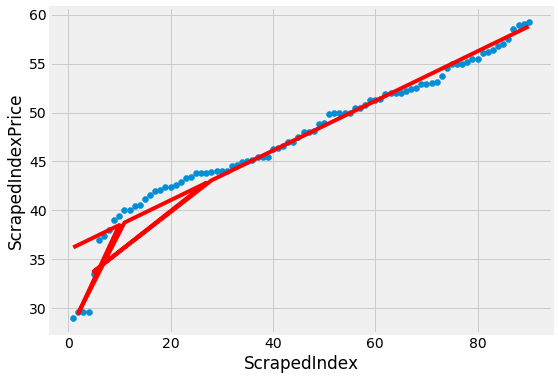

In [193]:
plt.scatter(am_honey1.ScrapedIndex,am_honey1.ScrapedIndexPrice)
plt.plot(am_honey1.ScrapedIndex, am_honey1.ScrapedIndexPrice_Pred, color='red')
plt.xlabel('ScrapedIndex')
plt.ylabel('ScrapedIndexPrice')

Text(0, 0.5, 'ScrapedVendorCode')

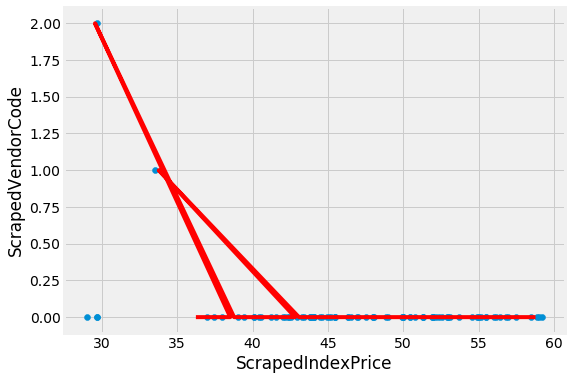

In [194]:
plt.scatter(am_honey1.ScrapedIndexPrice,am_honey1.ScrapedVendorCode)
plt.plot(am_honey1.ScrapedIndexPrice_Pred,am_honey1.ScrapedVendorCode, color='red')
plt.xlabel('ScrapedIndexPrice')
plt.ylabel('ScrapedVendorCode')

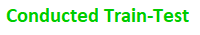

In [195]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)


In [196]:
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)

(90, 2)
(72, 2)
(18, 2)


In [197]:
import sklearn.metrics as metrics
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
y_pred= linreg.predict(X_test)

print(metrics.mean_squared_error(y_train, linreg.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

1.8832524833336162
3.797312002347142


In [199]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      ScrapedVendorCode  ScrapedIndex
3230                  0            79
3213                  0            62
3211                  0            60
3227                  0            76
3184                  0            33
      ScrapedVendorCode  ScrapedIndex
3167                  0            17
3175                  0            25
3222                  0            71
3178                  1             5
3207                  0            56
3230    55.47
3213    51.88
3211    51.30
3227    54.99
3184    44.64
Name: ScrapedIndexPrice, dtype: float64
3167    41.99
3175    43.80
3222    52.99
3178    33.50
3207    50.44
Name: ScrapedIndexPrice, dtype: float64


In [293]:
print(linreg.intercept_)
print(linreg.coef_)


36.03009239013049
[-3.43283109  0.25278489]


In [200]:
linreg.score(X, y)

0.9535133133362222

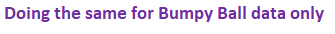

In [201]:
am_sassy1=pd.get_dummies(am_sassy[['ScrapedVendorCode','ScrapedIndex','ScrapedIndexPrice']],drop_first=True)
am_sassy1

,ScrapedVendorCode,ScrapedIndex,ScrapedIndexPrice
5929,0,1,5.70
5930,0,3,7.99
5931,0,4,8.99
5932,0,5,9.49
5933,0,6,9.81
...,...,...,...
6012,0,68,37.39
6013,0,69,38.01
6014,0,70,38.49
6015,0,71,38.84


In [202]:
feature_cols = ['ScrapedVendorCode','ScrapedIndex']
X = am_sassy1[feature_cols]
y = am_sassy1.ScrapedIndexPrice

In [203]:
linreg.fit(X,y)
pred_sassy1 = linreg.predict(X)
pred_sassy1

array([18.55789429, 18.7417124 , 18.83362145, 18.92553051, 19.01743956,
       19.10934862, 19.20125767, 19.29316673, 19.38507578, 19.47698484,
       19.56889389, 19.66080294, 19.752712  , 10.93782737, 19.84462105,
       25.91061867, 26.00252772, 26.09443678, 26.82970921, 26.92161827,
       27.01352732, 27.10543638, 27.19734543, 27.28925449, 27.38116354,
       27.4730726 , 27.74879976, 19.93653011, 20.02843916, 20.12034822,
       20.39607538, 20.48798444, 20.57989349, 20.67180255, 20.7637116 ,
       26.18634583, 26.27825489, 27.56498165, 27.65689071, 20.85562066,
       21.13134782, 21.22325688, 21.31516593, 16.35626929, 16.44817834,
       21.40707498, 21.49898404, 17.09154173, 17.18345078, 21.68280215,
       21.7747112 , 21.86662026, 21.95852931, 22.05043837, 22.14234742,
       22.23425648, 22.32616553, 22.41807459, 22.50998364, 22.6018927 ,
       22.69380175, 22.78571081, 22.87761986, 22.96952892, 23.06143797,
       23.15334702, 23.24525608, 17.73490511, 23.33716513, 23.42

In [204]:
am_sassy1['ScrapedIndexPrice_Pred'] = pred_sassy1

Text(0, 0.5, 'ScrapedIndexPrice')

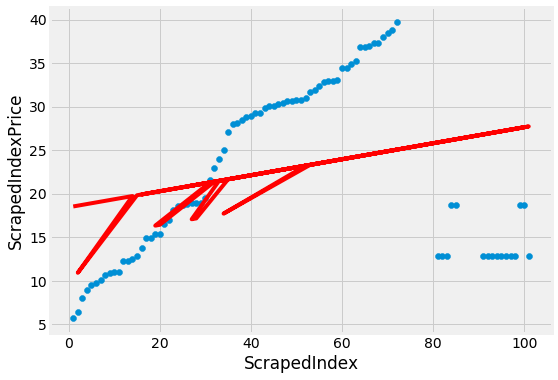

In [205]:
plt.scatter(am_sassy1.ScrapedIndex,am_sassy1.ScrapedIndexPrice)
plt.plot(am_sassy1.ScrapedIndex, am_sassy1.ScrapedIndexPrice_Pred, color='red')
plt.xlabel('ScrapedIndex')
plt.ylabel('ScrapedIndexPrice')

Text(0, 0.5, 'ScrapedVendorCode')

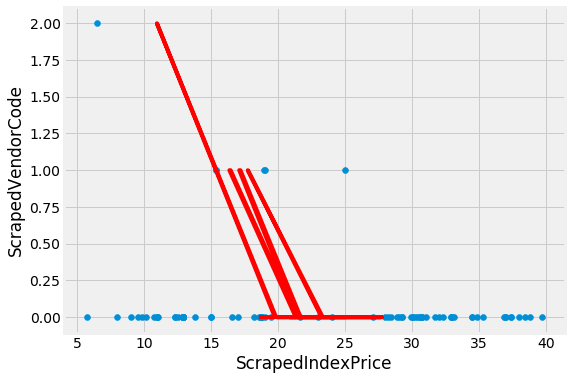

In [206]:
plt.scatter(am_sassy1.ScrapedIndexPrice,am_sassy1.ScrapedVendorCode)
plt.plot(am_sassy1.ScrapedIndexPrice_Pred,am_sassy1.ScrapedVendorCode, color='red')
plt.xlabel('ScrapedIndexPrice')
plt.ylabel('ScrapedVendorCode')

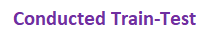

In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [208]:
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)

(88, 2)
(70, 2)
(18, 2)


In [209]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [210]:
y_pred = linreg.predict(X_test)

print(metrics.mean_squared_error(y_train, linreg.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

74.63885512889912
140.36588132666967


In [211]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      ScrapedVendorCode  ScrapedIndex
6007                  0            63
5990                  0            47
5988                  0            45
6004                  0            60
5961                  0            23
      ScrapedVendorCode  ScrapedIndex
5944                  0            81
5952                  0            96
5999                  0            55
5955                  0           101
5984                  0            41
6007    35.30
5990    30.48
5988    30.10
6004    34.47
5961    18.17
Name: ScrapedIndexPrice, dtype: float64
5944    12.87
5952    12.87
5999    32.35
5955    12.87
5984    29.27
Name: ScrapedIndexPrice, dtype: float64


In [212]:
print(linreg.intercept_)
print(linreg.coef_)

16.32306652218661
[-3.47442616  0.14864481]


In [213]:
linreg.score(X, y)

0.07429794223266573

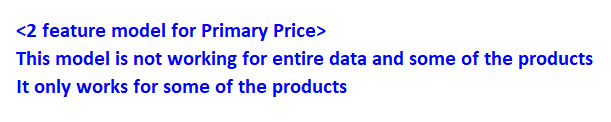

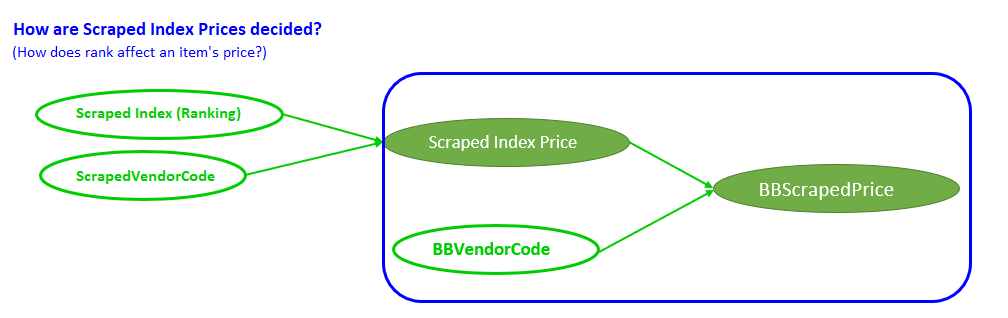

In [214]:
am2=am[['ScrapedIndexPrice','BBVendorCode','BBScrapedPrice']]
am2

,ScrapedIndexPrice,BBVendorCode,BBScrapedPrice
0,20.99,1,-1.00
1,19.99,1,-1.00
2,3.96,1,4.90
3,3.96,1,4.90
4,3.96,1,4.90
...,...,...,...
6968,34.14,2,19.99
6969,34.98,2,19.99
6970,35.00,2,19.99
6971,31.95,2,19.99


In [215]:
am2=pd.get_dummies(am[['ScrapedIndexPrice','BBVendorCode','BBScrapedPrice']],drop_first=True)
am2

,ScrapedIndexPrice,BBVendorCode,BBScrapedPrice
0,20.99,1,-1.00
1,19.99,1,-1.00
2,3.96,1,4.90
3,3.96,1,4.90
4,3.96,1,4.90
...,...,...,...
6968,34.14,2,19.99
6969,34.98,2,19.99
6970,35.00,2,19.99
6971,31.95,2,19.99


In [216]:
feature_cols = ['ScrapedIndexPrice','BBVendorCode']
X = am2[feature_cols]
y = am2.BBScrapedPrice

In [217]:
linreg.fit(X,y)
y_price_pred = linreg.predict(X)

am2['BBScrapedPrice_Pred'] = y_price_pred


Text(0, 0.5, 'BBScrapedPrice')

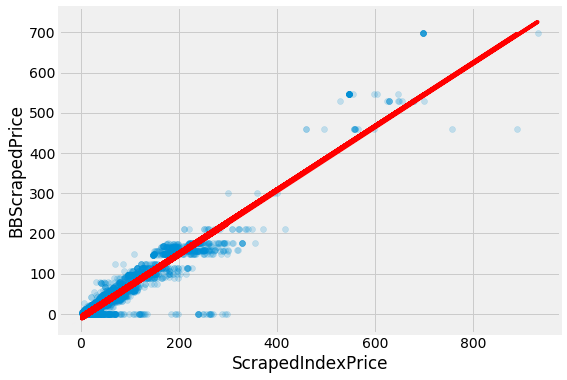

In [218]:
plt.scatter(am2.ScrapedIndexPrice,am2.BBScrapedPrice, alpha=0.2)
plt.plot(am2.ScrapedIndexPrice, am2.BBScrapedPrice_Pred, color='red')
plt.xlabel('ScrapedIndexPrice')
plt.ylabel('BBScrapedPrice')

Text(0, 0.5, 'BBVendorCode')

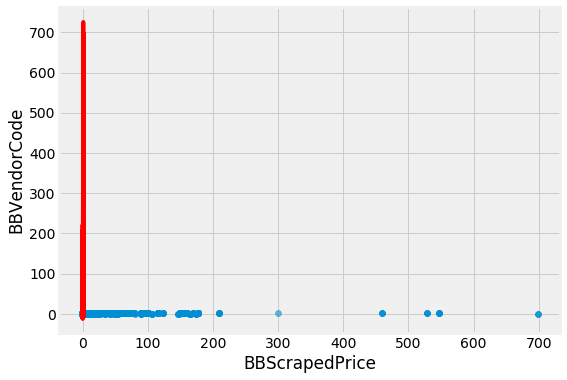

In [219]:
plt.scatter(am2.BBScrapedPrice,am2.BBVendorCode, alpha=0.2)
plt.plot(am2.BBVendorCode, am2.BBScrapedPrice_Pred, color='red')
plt.xlabel('BBScrapedPrice')
plt.ylabel('BBVendorCode')

In [220]:
print(linreg.intercept_)
print(linreg.coef_)

-13.071589100534915
[0.78913403 3.49638939]


In [221]:
linreg.score(X, y)

0.9011990647975239

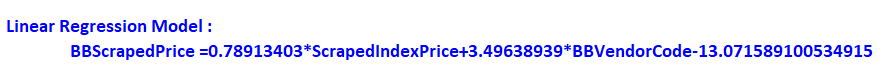

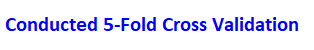

In [223]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [224]:
mse_values = []
scores = []
n = 0


for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X.iloc[test_index], y.iloc[test_index]))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))
   
print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

Model 1
MSE: 356.5394032404527
R2: 0.8921721013913615

Model 2
MSE: 392.70166157529843
R2: 0.9085305081380335

Model 3
MSE: 373.6887263453554
R2: 0.9081374954895135

Model 4
MSE: 440.43564980753416
R2: 0.8943577625009612

Model 5
MSE: 332.58556657558967
R2: 0.898512611167846

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 379.1902015088461
Mean of R2 for all folds: 0.9003420957375432


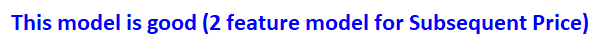